In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

data_file = 'PlasticDuct_Fan1002021-06-21 19-46-26.csv'

df = pd.read_csv(data_file)

df

,Time,Temperature set (C),Temperature measured (C),Sensor 1 (C),Sensor 2 (C),Sensor 3 (C),Sensor 4 (C)
0,1466.670554,9.583622,18.169798,16.758876,16.868564,15.285883,18.051556
1,1467.670451,9.542421,17.988722,16.956274,16.736942,15.351986,18.007794
2,1468.670859,9.575378,17.822087,16.868564,16.846619,15.307917,18.226674
3,1469.669832,9.583622,18.247914,17.438453,17.175509,15.528227,17.657474
4,1470.669930,9.591867,18.523866,17.394623,17.985908,15.329963,17.920229
5,1471.670893,9.583622,18.053179,16.758876,16.758876,15.307917,17.920229
6,1472.670281,9.591867,18.274033,19.364374,16.868564,15.418094,17.876444
7,1473.669336,9.600112,18.117885,17.109740,16.561395,15.660307,17.679384
8,1474.670155,9.600112,18.079043,17.219338,16.693066,15.594265,17.679384
9,1475.669394,9.591867,17.937291,17.766977,16.583342,15.329963,17.810763


In [59]:
window_size = 10
temp_set_rollling_avg= np.array(df.loc[:,'Temperature set (C)'].rolling(window = window_size, center = True).mean())
temp_measured_rollling_avg= np.array(df.loc[:,'Temperature measured (C)'].rolling(window = window_size, center = True).mean())

In [60]:
df['Temperature set (rolling mean) C'] = temp_set_rollling_avg
df['Temperature measured (rolling mean) C'] = temp_measured_rollling_avg

<IPython.core.display.Javascript object>


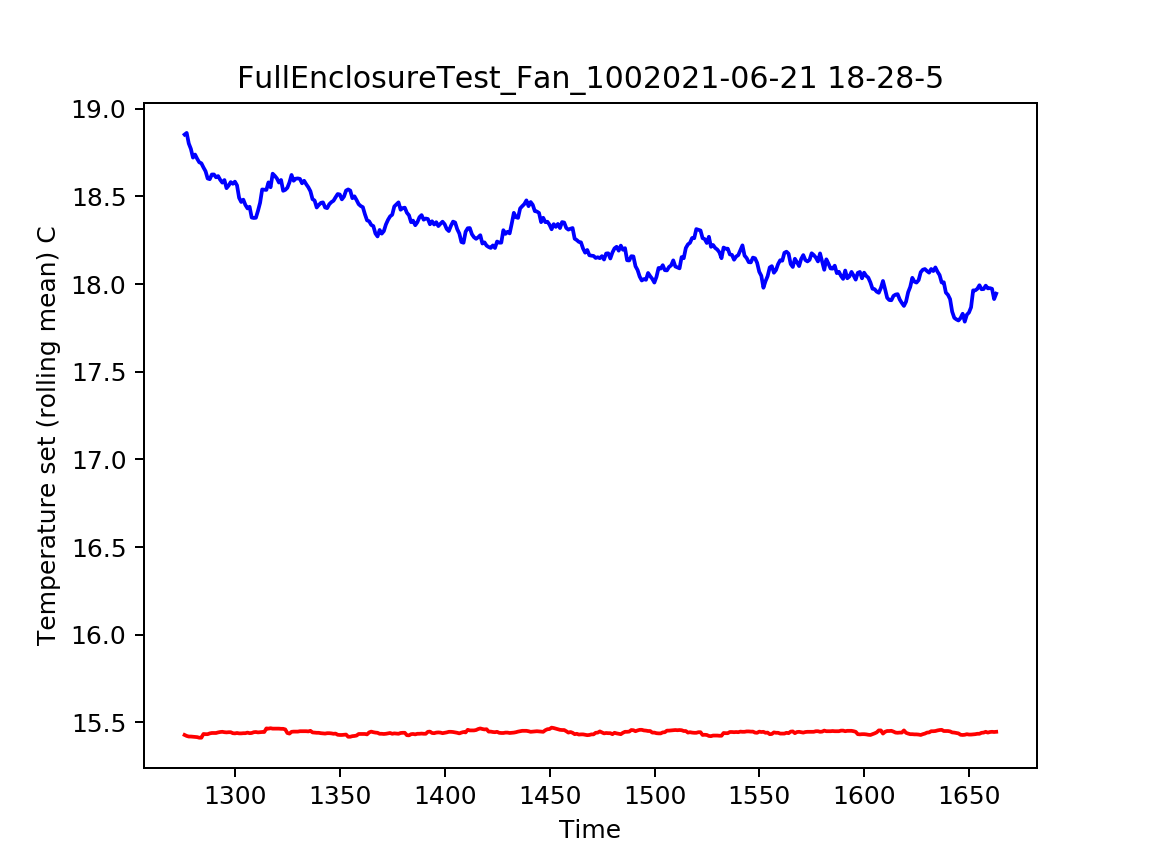

In [18]:
# Plot
%matplotlib notebook

plt.figure()
sns.lineplot(x = "Time", y = 'Temperature set (rolling mean) C', color = 'r', data =df)
sns.lineplot(x = "Time", y = 'Temperature measured (rolling mean) C', color = 'b', data = df)
plt.title(data_file[:-4])
# plt.savefig(data_file[:-4]+'.png', dpi = 300)
plt.show()

In [61]:
# Rolling average of other temp sensor readings
sens_1_rolling_avg= np.array(df.loc[:,'Sensor 1 (C)'].rolling(window = window_size, center = True).mean())
sens_2_rolling_avg= np.array(df.loc[:,'Sensor 2 (C)'].rolling(window = window_size, center = True).mean())
sens_3_rolling_avg= np.array(df.loc[:,'Sensor 3 (C)'].rolling(window = window_size, center = True).mean())
sens_4_rolling_avg= np.array(df.loc[:,'Sensor 4 (C)'].rolling(window = window_size, center = True).mean())

df['Sensor 1 (rolling avg)'] = sens_1_rolling_avg
df['Sensor 2 (rolling avg)'] = sens_2_rolling_avg
df['Sensor 3 (rolling avg)'] = sens_3_rolling_avg
df['Sensor 4 (rolling avg)'] = sens_4_rolling_avg

<IPython.core.display.Javascript object>


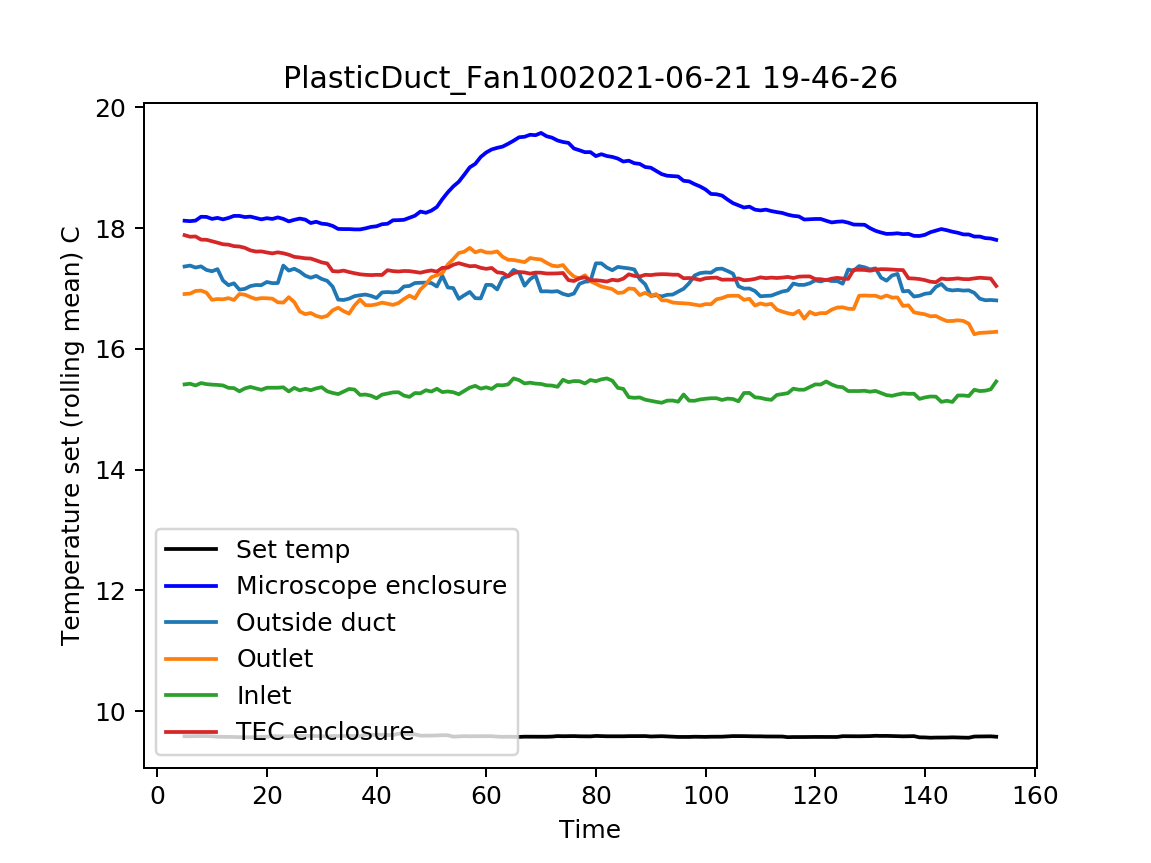

In [62]:
df["Time"] = df["Time"] - df["Time"][0]
# Plot the readings from the other sensors
plt.figure()
sns.lineplot(x = "Time", y = 'Temperature set (rolling mean) C', color = 'k', data =df, label = 'Set temp')
sns.lineplot(x = "Time", y = 'Temperature measured (rolling mean) C', color = 'b', data = df, label = 'Microscope enclosure')

sns.lineplot(x = "Time", y = 'Sensor 1 (rolling avg)', data = df, label = 'Outside duct')
sns.lineplot(x = "Time", y = 'Sensor 2 (rolling avg)', data = df, label = 'Outlet')
sns.lineplot(x = "Time", y = 'Sensor 3 (rolling avg)', data = df, label ='Inlet')
sns.lineplot(x = "Time", y = 'Sensor 4 (rolling avg)', data = df, label = 'TEC enclosure')

plt.legend()

plt.title(data_file[:-4])
plt.savefig(data_file[:-4]+'.png', dpi = 300)
plt.show()

In [57]:
# Fit a line to estimate slope
p = np.polyfit(np.array(df["Time"]), np.array(df["Temperature measured (C)"]), deg = 1)
p[0]

0.0007546244316720805

Al duct with insulation: -0.002784317280528533 C/s
Plastic duct: -0.003977967660890617 C/s (50% fan speed)
Plastic duct: -0.0028325221176321988 (25% fan speed)

 

<IPython.core.display.Javascript object>


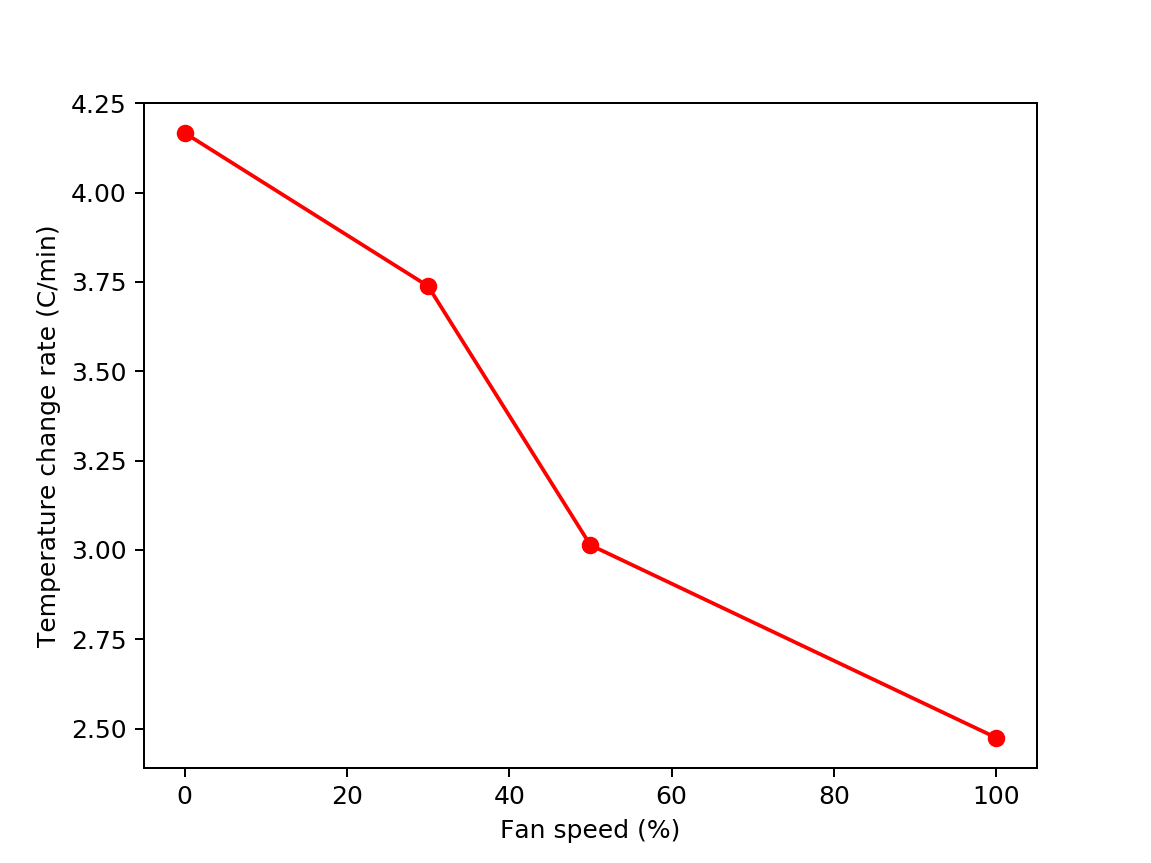

In [28]:
# Duct installed, No fan: -0.03684551
# No fan no duct (enclosure only): -0.0593734
# Duct installed + fan ON: -0.02263496
# Duct installed, Fan OFF: -0.03752431
# Enclosure only (Bigger Power supply): -0.06358272314324771
# ENclosure only (Smaller power supply): -0.0630065451067738
# Enclosure only (with Insulation): -0.07698356904560058


# Testing effects of fan-speed
# Fan + Duct: Fan speed=0 : -0.06945523464552782 C/s
# Fan + Duct: Fan speed=30: -0.062306531037606624 C/s
# Fan + Duct: Fan speed=50: -0.05022580126814528 C/s
# Fan + Duct: Fan speed=100: -0.04123832816494875 C/s
        
        
fan_speed = [0, 30, 50, 100]
temp_rate= 60*np.array([-0.06945523464552782, -0.062306531037606624, -0.05022580126814528, -0.04123832816494875])

plt.figure()
plt.plot(fan_speed, -temp_rate, 'ro-')
plt.xlabel('Fan speed (%)')
plt.ylabel('Temperature change rate (C/min)')
plt.savefig('Temp change rate vs fan speed.png', dpi = 300)
plt.show()

In [33]:
# Heat transfer calculations
Cp = 1 # 1kJ/kg K
rho_air = 1.22 #
Volume = 0.141 # m^3
Delta_T = 4
Time = 60

In [34]:
total_heat = lambda volume, delta_t: 1000*rho_air*volume*Cp*delta_t # heat in Joules

In [35]:
heat_transfer_rate = total_heat(Volume, Delta_T)/Time

In [36]:
print('Heat transfer rate: {} W'.format(heat_transfer_rate))

Heat transfer rate: 11.467999999999998 W


In [ ]:
# DeepCool Heat transfer rate: 1.8435555555555558 W
# ClimateRite (full microscope chamber): 2.1502499999999998 W
# ClimateRite (full microscope chamber): 3.4403999999999995 W
